# Image Clasification with Tensorflow (Neural Network)

## Library and Data load

First, is it recommended to create a virtual enviroment (and be sure to activate it!) as it may make the code to work better. Then, execute this code.

This line installs the libraries of the requirements.txt file in the specified versions that worked to me without problem.

In [ ]:
%pip install -q -r requirements.txt

This line imports the libraries so that you can use it in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

And then this line imports the Fashion MNIST dataset.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Finally we define the class names to use them when viewing the images.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data preprocessing

Let's check what does the model "see".

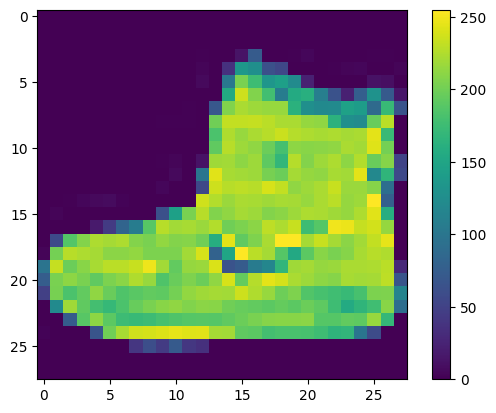

In [6]:
plt.figure() # We create a figure..
plt.imshow(train_images[0]) # ..and show the corresponding "train_images" image
plt.colorbar() # We give the image values a color bar
plt.grid(False) # We remove the grid
plt.show() # And finally show the image

We can identify easily the figures, but only because "we are already trained" to identify and associate images with objects. That's what we are going to make with neural networks, we are going to teach them what are some of the database figures and see if the model can identify new figures correctly.

The first step is to scale the images values from a 0-255 range to a 0-1 range by dividing the values by 255.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is ready to train the neural network, we will display some of the images with their corresponding name.

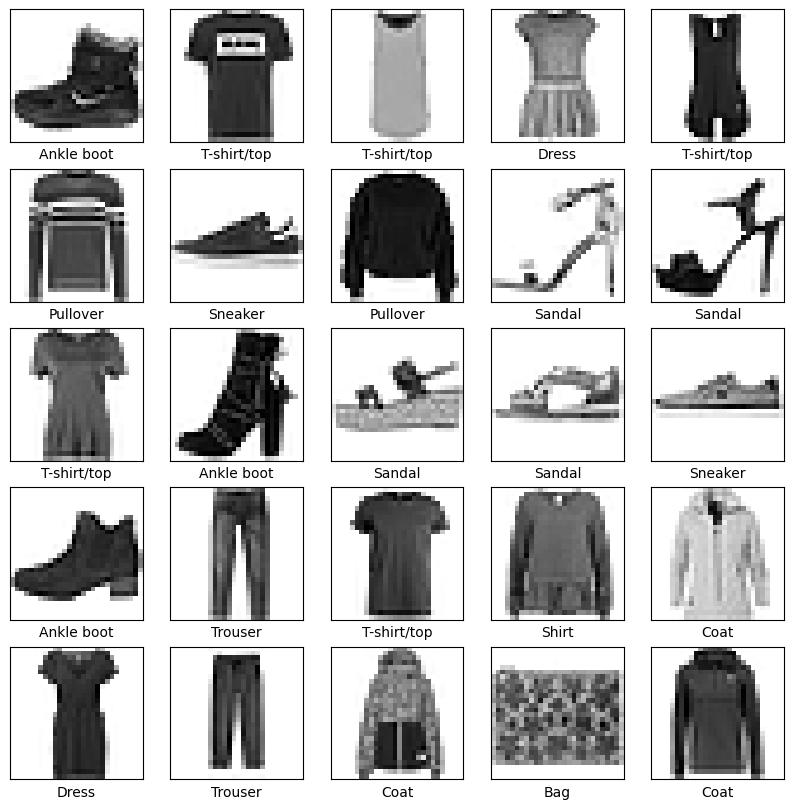

In [8]:
plt.figure(figsize=(10,10)) # This creates a figure with a size of 10x10..
for i in range(25):
    plt.subplot(5,5,i+1) # .. so that we can show 25 images in a 5x5 grid
    plt.xticks([]) # Remove the x-axis ticks marks
    plt.yticks([]) # Remove the y-axis ticks marks
    plt.grid(False) # Remove the grid
    plt.imshow(train_images[i], cmap=plt.cm.binary) # This decides which image to use (i = 0-24) and the color map
    plt.xlabel(class_names[train_labels[i]]) # This shows the corresponding image label under the photo
plt.show()

## Build the model

### Set the layers

In [9]:
model = keras.Sequential([  # The Sequential class of the keras module is used to create a linear stack of layers
    keras.layers.Flatten(input_shape=(28, 28)), # The Flatten layer transforms a 2D input in a 1D array, reshaping a 28x28 matrix in a 784 element 
                                                # vector, typical in grayscale images of 28x28 pixels 
    keras.layers.Dense(128, activation='relu'), # The Dense layer means that each of the 128 neurons in this layer is connected to every previous layer 
                                                # neuron. ReLU function introduces non-linearity in the model, which allows it to learn more complex patterns
    keras.layers.Dense(10)  # The last layer is another Dense layer with 10 neurons, the same as the number of classes in the dataset. This layer typically
                            # represents the output layer and does not specify and activation function. The output are usually probabilities as they are
                            # passed through a softmax function
])

c:\Users\juanv\Documents\GitHub\Image-Clasification-with-TensorFlow\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [10]:
model.compile(optimizer='adam',     # The adam optimizer, which stands for Adapttive Moment Estimation, is a popular optimization algorithm that combines two
                                    # extensions of stochastic gradient descent. It adapts the learning rate for each parameter and uses first and second 
                                    # moments of the gradients to improve convergence speed and performance.

            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),   # This loss function receives the model's output (which are raw logits),
                                                                                    # and then, the Sparse Categorical Crossentropy loss function apply
                                                                                    # the softmax function to the logits to compute the probabilities and
                                                                                    # therefore the cross-entropy loss.
                                                                                    
            metrics=['accuracy'])   # This means that the model will use the ACCURACY(*) metric to measure the performance of the model. 
                                    # (*) Accuracy refers to the proportion of correctly predicted labels to the total number of predictions.

## Train the model

In [11]:
# Fit/train the model
model.fit(train_images, train_labels, epochs=10)    # The model trains with the training data for 10 epochs (the model iterates the entire training
                                                    # dataset 10 times). In each epoch, the model adjusts its weights to get better predicctions.

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)  # Once the model is trained, we evaluate it with new "test" data. The evaluate
                                                                            # method returns the loss and accuracy of the model on the test data.
                                                                            # verbose=2 means that the progress will be shown with a progress bar each epoch.
                                                                            
print('\nTest accuracy:', test_acc)   # Print the accuracy of the model on the test data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7806 - loss: 0.6217
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8597 - loss: 0.3869
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8736 - loss: 0.3466
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8832 - loss: 0.3175
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8924 - loss: 0.2905
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8960 - loss: 0.2814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8975 - loss: 0.2719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9084 - loss: 0.2528
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9090 - loss: 0.2483
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9101 - loss: 0.2380
313/313 - 0s - 1ms/step - accuracy: 0.8746 - loss: 0.3613

Test accuracy: 0.8745999932289124


Once the model has been trained and tested, we obtain a Test accuracy, which represents the percentage or proportion of correctly predicted labels over the total amount of predictions that have been made. For example, a Test accuracy of 0.88 means that the model correctly predicts 88% of the images shown.

Now, we will try to make predictions.

In [12]:
# Make Predictions
probability_model = tf.keras.Sequential([model,     # We create a new sequential model that contains the previous model and a softmax layer. 
                        tf.keras.layers.Softmax()]) # The softmax layer converts the raw output logits into probabilities and also normalizes
                                                    # the output so that the sum of all probabilities is equal to 1, making it easier to interpret the 
                                                    # model's predictions as the probability of being each class. 

predictions = probability_model.predict(test_images)  # If we ask for predictions of the probability_model, the output that we will obtain is an array of 10 
                                                        # between 0 and 1 float numbers, each one representing the probability of the image being each class.
predictions[0] # Then we access to the first element of the predictions array, which is the probability of the first image being each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.1408239e-07, 6.2978796e-09, 1.3812413e-08, 5.4424685e-08,
       3.1931140e-09, 4.9364399e-03, 1.1710404e-07, 7.4576410e-03,
       8.1536427e-08, 9.8760533e-01], dtype=float32)

Now, we look at the probabilities array and choose the label which has the biggest number (the highest confidence about the image being each class). With an array of 10 elements it's easy to locate it, but if we had many we can use:

In [13]:
np.argmax(predictions[0])

9

The model predicts with a 99.52% of confidence that the object number 1 should have the label number 9.

Let's check if this is true...

In [14]:
test_labels[0]

9

Yay! The model successfully identified the first object.

## Predictions verifier

We are going to use a couple of functions to plot our predictions graphically

In [15]:
def plot_image(i, predictions_array, true_label, img):
    """
    This function plots the i-th image of the predicted garment and some information about it.

    Parameters:
    i: the index of the image to plot.
    predictions_array: the array of probabilities of the image being each class.
    true_label: the true label of the image.
    img: the image to plot.

    Returns:
    None
    """

    true_label, img = true_label[i], img[i] # The true labels and images are the corresponding i-th element of the true_label and img arrays.
    plt.grid(False) # No grid.
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary) # Show the image in black and white.

    predicted_label = np.argmax(predictions_array) # The predicted label is the index of the highest probability label in the predictions array.
    if predicted_label == true_label: # If the predicted label is correct, the color of the text is blue and red otherwise.
        color = 'green'
    else:
        color = 'red'

    # Write some information below the image.
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # The predicted label name.
                                    100*np.max(predictions_array),     # The confidence percentage of the prediction being the predicted label.
                                    class_names[true_label]),          # The true label name.
                                    color=color)                       # The color of the text (green if correct, red otherwise).


def plot_value_array(i, predictions_array, true_label):
    """
    This function plots a bar plot with the probabilities of the i-th image being each class.

    Parameters:
    i: the index of the image to plot.
    predictions_array: the array of probabilities of the image being each class.
    true_label: the true label of the image.

    Returns:
    None
    """

    true_label = true_label[i] # The true label is the corresponding i-th element of the true_label array.
    plt.grid(False) # No grid.
    plt.xticks(range(10)) # Set 10 ticks for the x-axis ticks, which are the class names.
    plt.yticks([]) # No y-axis ticks.
    thisplot = plt.bar(range(10), predictions_array, color="#777777") # Create a bar plot with the predicted probabilities of the image being each class.
                                                                        # They are also set to be gray.
    plt.ylim([0, 1]) # Set the y-axis limits from 0 to 1.
    predicted_label = np.argmax(predictions_array) # The predicted index of the predictions array.

    thisplot[predicted_label].set_color('red')  # The predicted label bar is set to red.
    thisplot[true_label].set_color('green')     # The corresponding True label is set to green. As this line is executed after the predicted label color,
                                                # in case that the prediction label is correct, the color bar will be overwritten by the green color.
                                                # In other words, in successful predictions, there will be one green bar among grey bars and in wrong
                                                # predictions, there will be one green bar (expected prediction), one red bar (the prediction) and grey 
                                                # bars (the rest of the option, with less probabilities).

Let's see an example of how to interpret the graphs

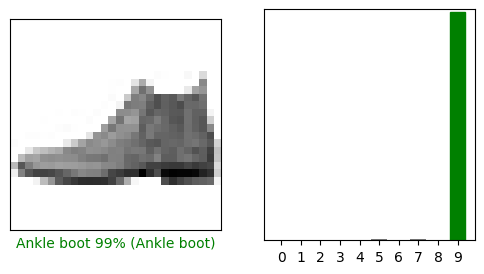

In [24]:
i = 0 # We only want to see the graphs of the first image.
plt.figure(figsize=(6,3)) # Create a figure with a size of 6x3.
plt.subplot(1,2,1) # Create a subplot with 1 row and 2 columns, and select the first column.
plot_image(i, predictions[i], test_labels, test_images) # Use the plot_image function to plot the image and the information
plt.subplot(1,2,2) # Now select the second column.
plot_value_array(i, predictions[i],  test_labels) # And use the plot_value_array function to plot the probabilities bar plot.
plt.show()

At the left, we see the image of the object to be identified. Below it we can see the name of the object that the model thinks it is and its confidence percentage, compared with the authentic type of object it is between brackets. 

At the right, we see the probabilities that the model assigns to the image belonging to each one of the garment classes. The highest the bar, the more probability. The green bar indicates the correct object of the image and the red one the object that the model thinks it is. If there is no red bar it means that the model successfully predicted the object class (which can also be seen in the left image if both are the same).

Now let's repeat this for the next 20 images.

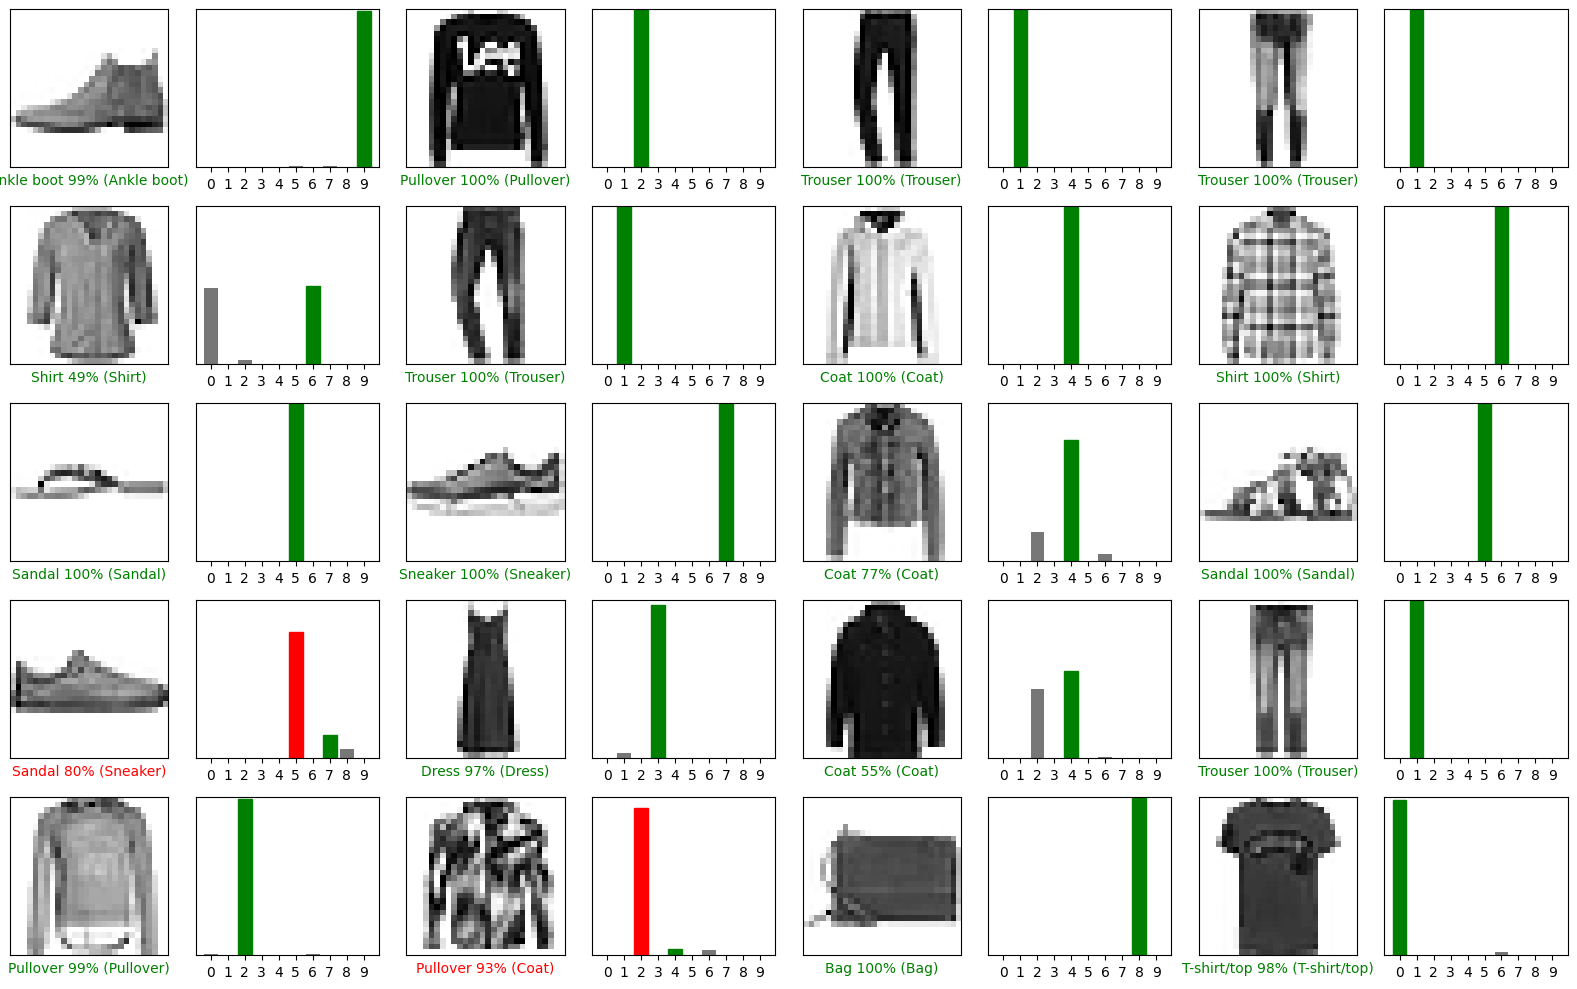

In [17]:
num_rows = 5 # 5 rows of images.
num_cols = 4 # 4 columns of images. 
num_images = num_rows*num_cols # The total number of pair of images (object and bar plot) to show (20).
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # Create a figure with enough space to show all the images.
for i in range(num_images): # Iterate over the first 20 images, in this case.
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions[i], test_labels, test_images) # Plot the object image and information.
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels) # Plot the probabilities bar plot.
plt.tight_layout() # Adjust the layout of the plots.
plt.show()

We can see that the model predicts correctly 18 out of the 20 first images.